## Features reduction

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sb

df = pd.read_excel("../data/t00/UG_HH_NEW_continuous_no200_train.xls")

df_full = pd.read_excel("../data/t00/UG_HH_NEW_continuous_no200.xls")
df_min = df_full.min()
df_max = df_full.max()

#Drop 'protected' features
drop_cols = ['prop', 'other_prop', 'other_resp']
df = df[[col for col in df if col not in drop_cols]]

df.head()

,time_spent_risk,cells,selfish,time_spent_prop,count_effort,Honesty_Humility,Extraversion,Agreeableness,min_offer
0,43000,26,60,31000,20,4.2,3.0,2.8,50
1,12000,7,20,38000,20,1.9,4.4,2.9,50
2,88000,50,20,69000,12,3.3,3.8,3.4,80
3,24000,50,60,26000,14,3.6,3.8,2.6,50
4,137000,24,60,43000,4,3.6,2.5,2.7,100


## Individual plots

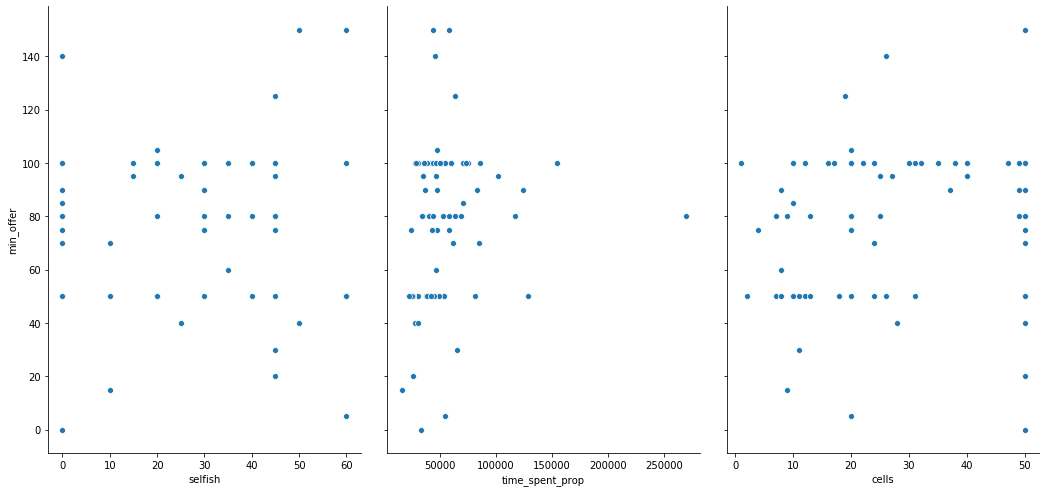

In [2]:
# sb.pairplot(df, x_vars=('prop','other_resp','other_prop'), y_vars='min_offer', height=7, aspect=0.7, kind='reg')

sb.pairplot(df, x_vars=('selfish', 'time_spent_prop', 'cells'), y_vars='min_offer', height=7, aspect=0.7)

## Train model with top features

In [3]:
from core.utils.preprocessing import df_to_xy
top_columns = ['selfish', 'time_spent_prop']
#top_columns = ['cells', 'time_spent_prop']
x, y = df_to_xy(df, centered=False, select_columns=top_columns, min_target=5, max_target=190)
split = int(x.shape[0] * 0.6)
xTrain, yTrain = x[:split], y[:split]
xTest, yTest = x[split:], y[split:]
#TODO: check later

df_test = pd.read_excel("../data/HH_SURVEY1/UG_HH_NEW_continuous_no200_test.xls")
xTest, yTest = df_to_xy(df_test, centered=False, select_columns=top_columns)

     selfish  time_spent_prop
0   1.000000         0.115242
1   0.333333         0.141264
2   0.333333         0.256506
3   1.000000         0.096654
4   1.000000         0.159851
5   0.333333         0.208178
6   0.666667         0.130112
7   0.500000         0.137546
8   0.000000         0.308550
9   0.416667         0.104089
10  0.666667         0.156134
11  0.333333         0.178439
12  0.666667         0.163569
13  0.750000         0.096654
14  1.000000         0.204461
15  0.000000         0.130112
16  0.333333         0.223048
17  1.000000         0.171004
18  0.000000         0.133829
19  0.166667         0.059480
20  0.500000         0.200743
21  0.500000         0.178439
22  0.500000         0.572491
23  0.666667         0.197026
24  0.750000         0.278810
25  1.000000         0.163569
26  0.500000         0.089219
27  0.000000         0.115242
28  0.500000         0.460967
29  1.000000         0.144981
..       ...              ...
49  1.000000         0.182156
50  0.8333

In [4]:
from sklearn.svm import SVR
from core.models import AcceptanceModel
model = AcceptanceModel(SVR(gamma='auto'))
model.fit(xTrain, yTrain)

In [5]:
from core.models.metrics import gain_mean, avg_loss_ratio, MAX_GAIN
from core.utils.explanation import generate_decision_area
yPred = model.predict(xTest)
print("Mean gain: ", gain_mean(yTest, yPred))
print("AVG loss ratio: ", avg_loss_ratio(yTest, yPred))
pd.DataFrame(data={"Mean gain: ": [gain_mean(yTest, yPred)], "AVG loss ratio: ": [avg_loss_ratio(yTest, yPred)]})

Mean gain:  88.3615
AVG loss ratio:  0.2613965070693236


,Mean gain:,AVG loss ratio:
0,88.3615,0.261397


In [6]:
print("Unique predicted values: ", np.unique(yPred))

Unique predicted values:  [ 95. 100. 105. 110.]


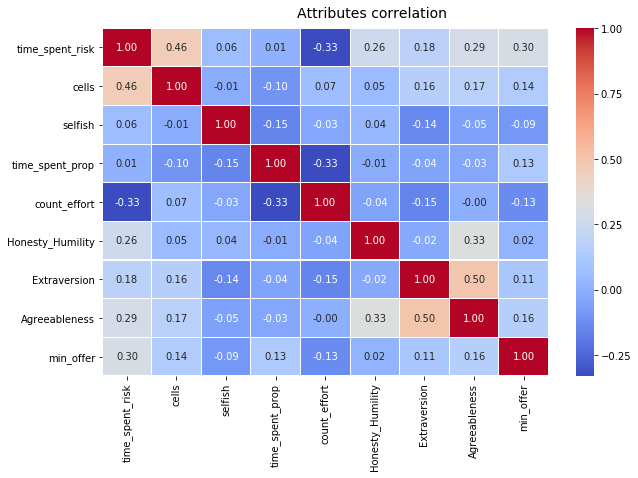

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Attributes correlation', fontsize=14)

     selfish  time_spent_prop
0   1.000000         0.059289
1   0.333333         0.086957
2   0.333333         0.209486
3   1.000000         0.039526
4   1.000000         0.106719
5   0.333333         0.158103
6   0.666667         0.075099
7   0.500000         0.083004
8   0.000000         0.264822
9   0.416667         0.047431
10  0.666667         0.102767
11  0.333333         0.126482
12  0.666667         0.110672
13  0.750000         0.039526
14  1.000000         0.154150
15  0.000000         0.075099
16  0.333333         0.173913
17  1.000000         0.118577
18  0.000000         0.079051
19  0.166667         0.000000
20  0.500000         0.150198
21  0.500000         0.126482
22  0.500000         0.545455
23  0.666667         0.146245
24  0.750000         0.233202
25  1.000000         0.110672
26  0.500000         0.031621
27  0.000000         0.059289
28  0.500000         0.426877
29  1.000000         0.090909
..       ...              ...
49  1.000000         0.130435
50  0.8333

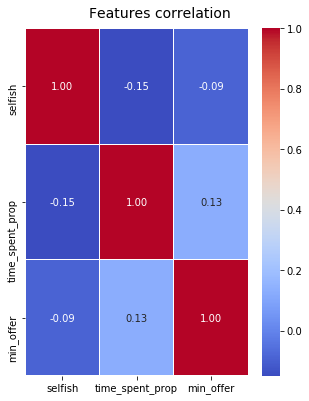

In [8]:
from core.utils.preprocessing import df_to_xydf
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(5, 6))
df_x, df_y = df_to_xydf(df, select_columns=top_columns, df_min=df_min, df_max=df_max)
df_corr = df_x.copy()
df_corr['min_offer'] = df_y['min_offer']
corr = df_corr.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Features correlation', fontsize=14)

**Validation DATA**

In [9]:
lbl1, lbl2 = top_columns
x1 = xTest[:, 0].ravel()
x2 = xTest[:, 1].ravel()

yPred = model.predict(xTest)

print("Mean gain: ", gain_mean(yTest, yPred))
print("AVG loss ratio: ", avg_loss_ratio(yTest, yPred))

Mean gain:  88.3615
AVG loss ratio:  0.2613965070693236


AVG loss ratio:  0.26876077373039564


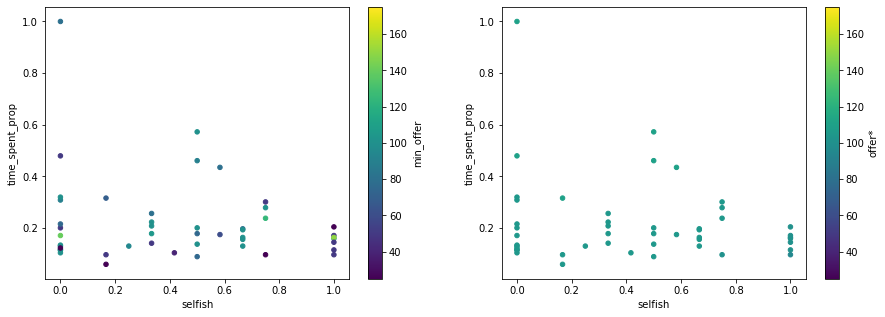

In [10]:
VMIN = 25
VMAX = 175
NB_VALUES = 64
from core.utils.explanation import generate_decision_area, generate_features_space_df
features_df = generate_features_space_df(nb_features=len(top_columns), nb_values=NB_VALUES, labels=top_columns)

x1 = xTrain[:, 0].ravel()
x2 = xTrain[:, 1].ravel()

yPred = model.predict(xTrain)
print("AVG loss ratio: ", avg_loss_ratio(yTrain, yPred))

fig, ax = plt.subplots(1,2,  figsize=(15, 5),)

out_df_real = pd.DataFrame({lbl1: x1, lbl2: x2, 'min_offer': yTrain.ravel()})
out_df_real.plot.scatter(x=lbl1, y=lbl2, c='min_offer', colormap='viridis', ax=ax[0], vmin=VMIN, vmax=VMAX)

#plt.subplot(1, 1, 1)
out_df_pred = pd.DataFrame({lbl1: x1, lbl2: x2, 'offer*': yPred})
out_df_pred.plot.scatter(x=lbl1, y=lbl2, c='offer*', colormap='viridis', ax=ax[1], vmin=VMIN, vmax=VMAX)

## Generate data for the survey

In [11]:
# Read and sanitize the data
df_test = pd.read_excel("../data/HH_SURVEY1/UG_HH_NEW_continuous_no200_test.xls")

drop_cols = ['prop', 'other_prop', 'other_resp']
df_test = df_test[[col for col in df_test if col not in drop_cols]]

df_features, df_y = df_to_xydf(df_test, centered=False, select_columns=top_columns, df_min=df_min, df_max=df_max)
predictions = model.predict(df_features.values).astype(int)

df_final = df_test[top_columns].copy()
#RESCALE FEATURES
df_final['pred_min_offer'] = predictions.ravel()
df_final['min_offer'] = df_y['min_offer']
df_final.head()

     selfish  time_spent_prop
0   0.416667         0.166008
1   0.500000         0.197628
2   0.500000         0.086957
3   0.250000         0.545455
4   0.250000         0.264822
5   0.333333         0.217391
6   1.000000         0.189723
7   0.666667         0.260870
8   0.500000         0.126482
9   0.500000         0.209486
10  0.666667         0.086957
11  0.666667         0.027668
12  0.250000         0.288538
13  0.000000         0.086957
14  0.750000         0.213439
15  0.666667         0.075099
16  0.833333         0.146245
17  0.000000         0.083004
18  0.000000         0.308300
19  0.666667         0.075099
20  0.500000         0.063241
21  0.250000         0.225296
22  1.000000         0.169960
23  0.750000         0.177866
24  0.416667         0.106719
25  1.000000         0.138340
26  0.666667         0.075099
27  0.000000         0.114625
28  0.750000         0.067194
29  0.750000         0.126482
..       ...              ...
70  0.250000         0.102767
71  0.1666

,selfish,time_spent_prop,pred_min_offer,min_offer
0,25,58000,105,100
1,30,66000,105,120
2,30,38000,105,100
3,15,154000,110,90
4,15,83000,105,100


In [12]:
## df_final.to_excel("../data/HH_SURVEY1/UG_HH_NEW_continuous_no200_test_PRED.xls", index=False)

Mean gain:  92.852
AVG loss ratio:  0.222781699188092


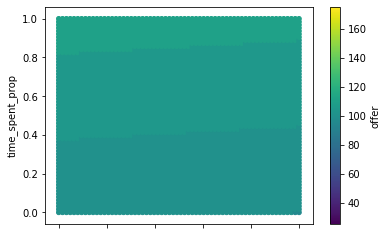

In [12]:
from core.models.metrics import gain_mean, avg_loss_ratio
model = AcceptanceModel()
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)
print("Mean gain: ", gain_mean(yTest, yPred))
print("AVG loss ratio: ", avg_loss_ratio(yTest, yPred))

out_df = generate_decision_area(model, features_df)
out_df.plot.scatter(x=lbl1, y=lbl2, c='offer', colormap='viridis', vmin=VMIN, vmax=VMAX)

# from mlxtend.plotting import plot_decision_regions
# fig = plot_decision_regions(X=xTest, y=yTest.ravel(), clf=model, legend=2)

Mean gain:  86.1385
AVG loss ratio:  0.2797663524781777


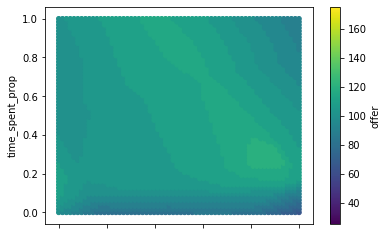

In [13]:
from core.models.metrics import gain_mean, avg_loss_ratio
from sklearn.neural_network import MLPRegressor
model = AcceptanceModel(MLPRegressor(max_iter=1000))
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)
print("Mean gain: ", gain_mean(yTest, yPred))
print("AVG loss ratio: ", avg_loss_ratio(yTest, yPred))


out_df = generate_decision_area(model, features_df)
out_df.plot.scatter(x=lbl1, y=lbl2, c='offer', colormap='viridis', vmin=VMIN, vmax=VMAX)

# from mlxtend.plotting import plot_decision_regions
# fig = plot_decision_regions(X=xTest, y=yTest.ravel(), clf=model, legend=2)

Mean gain:  61.1945
AVG loss ratio:  0.47546138674943794


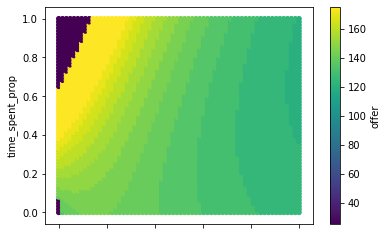

In [14]:
from core.models.metrics import gain_mean, avg_loss_ratio
from sklearn.svm import SVR
model = AcceptanceModel(SVR(gamma='auto', kernel='sigmoid', degree=3))
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)
print("Mean gain: ", gain_mean(yTest, yPred))
print("AVG loss ratio: ", avg_loss_ratio(yTest, yPred))

out_df = generate_decision_area(model, features_df)
out_df.plot.scatter(x=lbl1, y=lbl2, c='offer', colormap='viridis', vmin=VMIN, vmax=VMAX)

# from mlxtend.plotting import plot_decision_regions
# fig = plot_decision_regions(X=xTest, y=yTest.ravel(), clf=model, legend=2)

Mean gain:  93.0
AVG loss ratio:  0.22162494908626462


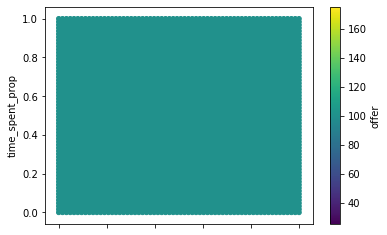

In [15]:
from core.models.metrics import gain_mean, avg_loss_ratio
from sklearn.svm import SVC
model = SVC(gamma="auto")
model.fit(xTrain, yTrain.ravel())
yPred = model.predict(xTest)
print("Mean gain: ", gain_mean(yTest, yPred))
print("AVG loss ratio: ", avg_loss_ratio(yTest, yPred))

out_df = generate_decision_area(model, features_df)
out_df.plot.scatter(x=lbl1, y=lbl2, c='offer', colormap='viridis', vmin=VMIN, vmax=VMAX)

Mean gain:  63.077
AVG loss ratio:  0.5111568449128858


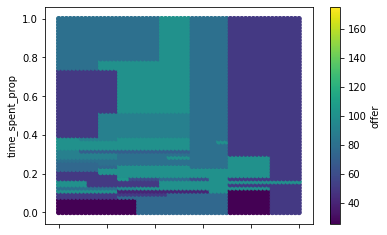

In [16]:
from core.models.metrics import gain_mean, avg_loss_ratio
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()
model.fit(xTrain, yTrain.ravel())
yPred = model.predict(xTest)
print("Mean gain: ", gain_mean(yTest, yPred))
print("AVG loss ratio: ", avg_loss_ratio(yTest, yPred))

out_df = generate_decision_area(model, features_df)
out_df.plot.scatter(x=lbl1, y=lbl2, c='offer', colormap='viridis', vmin=VMIN, vmax=VMAX)

Mean gain:  93.0
AVG loss ratio:  0.22162494908626462


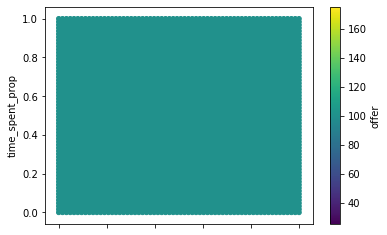

In [17]:
from core.models.metrics import gain_mean, avg_loss_ratio
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', multi_class='auto')
model.fit(xTrain, yTrain.ravel())
yPred = model.predict(xTest)
print("Mean gain: ", gain_mean(yTest, yPred))
print("AVG loss ratio: ", avg_loss_ratio(yTest, yPred))

out_df = generate_decision_area(model, features_df)
out_df.plot.scatter(x=lbl1, y=lbl2, c='offer', colormap='viridis', vmin=VMIN, vmax=VMAX)

Mean gain:  79.95
AVG loss ratio:  0.3496950322818899


/home/franck/anaconda3/envs/thesis/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


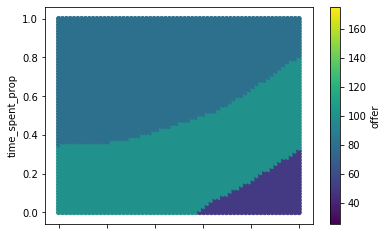

In [18]:
from core.models.metrics import gain_mean, avg_loss_ratio
from sklearn.neural_network import MLPClassifier
model = MLPClassifier((32, 32, 32, 32, 32))
model.fit(xTrain, yTrain.ravel())
yPred = model.predict(xTest)
print("Mean gain: ", gain_mean(yTest, yPred))
print("AVG loss ratio: ", avg_loss_ratio(yTest, yPred))

out_df = generate_decision_area(model, features_df)
out_df.plot.scatter(x=lbl1, y=lbl2, c='offer', colormap='viridis', vmin=VMIN, vmax=VMAX)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Mean gain:  67.17090978775025
AVG loss ratio:  0.42847669315484005


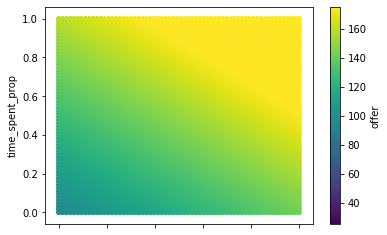

In [21]:
from core.models.metrics import gain_mean, avg_loss_ratio
from core.models.deep import KerasModel
model = KerasModel()
model.fit(xTrain, yTrain.ravel())
yPred = model.predict(xTest)
print("Mean gain: ", gain_mean(yTest, yPred))
print("AVG loss ratio: ", avg_loss_ratio(yTest, yPred))

out_df = generate_decision_area(model, features_df)
out_df.plot.scatter(x=lbl1, y=lbl2, c='offer', colormap='viridis', vmin=VMIN, vmax=VMAX)

In [22]:
from mlxtend.evaluate import feature_importance_permutation

coefs:  [ 0.00773869 -0.13851288  2.58399025]


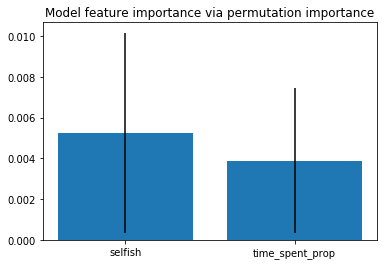

In [23]:
# from utils.benchmark import process_benchmark_cv

# process_benchmark_cv(MLPClassifier(), x, y.ravel())
model = AcceptanceModel()
model.fit(xTrain, yTrain)
print("coefs: ", model.base_model.coef_)

imp_vals, imp_all = feature_importance_permutation(
    predict_method=model.predict, 
    X=xTrain,
    y=yTrain,
    metric='accuracy',
    num_rounds=5,
    seed=5)

imp_df = pd.DataFrame({top_columns[idx]:[imp_vals[idx]] for idx in range(len(top_columns))})

std = np.std(imp_all, axis=1)
indices = np.argsort(imp_vals)[::-1]


plt.figure()
plt.title("Model feature importance via permutation importance")
plt.bar([top_columns[idx] for idx in indices], imp_vals[indices],
        yerr=std[indices])
plt.show()

In [24]:
dx, dy = df_to_xy(df)
model = AcceptanceModel()
model.fit(dx, dy)
model.base_model.coef_

    time_spent_risk  cells   selfish  time_spent_prop  count_effort  \
0          0.282895   0.52  1.000000         0.115242          20.0   
1          0.078947   0.14  0.333333         0.141264          20.0   
2          0.578947   1.00  0.333333         0.256506          12.0   
3          0.157895   1.00  1.000000         0.096654          14.0   
4          0.901316   0.48  1.000000         0.159851           4.0   
5          0.618421   0.32  0.333333         0.208178          11.0   
6          0.953947   0.80  0.666667         0.130112          14.0   
7          0.151316   0.24  0.500000         0.137546          15.0   
8          0.690789   0.74  0.000000         0.308550          15.0   
9          0.401316   1.00  0.416667         0.104089          17.0   
10         0.125000   0.20  0.666667         0.156134          12.0   
11         0.348684   0.40  0.333333         0.178439          16.0   
12         0.427632   0.62  0.666667         0.163569           9.0   
13    

/home/franck/anaconda3/envs/thesis/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([-2.50306511e-01, -1.71416483e-02,  5.69158341e-02, -1.64468242e-01,
       -1.56744149e-02,  1.09992762e-01, -1.50359556e-03, -1.43800299e-01,
        2.63886855e+00])

In [25]:
imp_vals, _ = feature_importance_permutation(
    predict_method=model.predict, 
    X=dx,
    y=dy,
    metric='accuracy',
    num_rounds=1,
    seed=1)

imp_vals

array([0.02291299, 0.        , 0.02018907, 0.00785131, 0.01089569,
       0.00016023, 0.00384554, 0.02836084])

/home/franck/anaconda3/envs/thesis/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


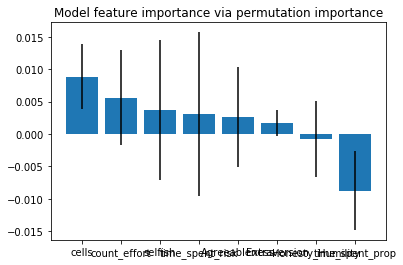

In [26]:
model = AcceptanceModel()
model.fit(dx, dy)
imp_vals, imp_all = feature_importance_permutation(
    predict_method=model.predict, 
    X=dx,
    y=dy,
    metric='accuracy',
    num_rounds=5,
    seed=5)

#imp_df = pd.DataFrame({top_columns[idx]:[imp_vals[idx]] for idx in range(len(top_columns))})

std = np.std(imp_all, axis=1)
indices = np.argsort(imp_vals)[::-1]


plt.figure()
plt.title("Model feature importance via permutation importance")
plt.bar([df.columns[idx] for idx in indices], imp_vals[indices],
        yerr=std[indices],)
plt.show()

In [27]:
model.fit(xTrain, yTrain)
model.base_model.predict(np.array([[0, 0, 0.99]]))

array([1.43883023])

In [28]:
pdf, bins = np.histogram(np.append(yTrain, 200), density=True, bins=np.arange(0, 201, 5))
cumpdf = np.cumsum(pdf)
cumpdf, bins

(array([0.        , 0.00833333, 0.00833333, 0.0125    , 0.01666667,
        0.01666667, 0.01666667, 0.01666667, 0.02083333, 0.02083333,
        0.05833333, 0.05833333, 0.0625    , 0.0625    , 0.06666667,
        0.07916667, 0.1       , 0.1       , 0.10833333, 0.1125    ,
        0.17916667, 0.18333333, 0.18333333, 0.18333333, 0.18333333,
        0.1875    , 0.1875    , 0.1875    , 0.19166667, 0.19166667,
        0.19583333, 0.19583333, 0.19583333, 0.19583333, 0.19583333,
        0.19583333, 0.19583333, 0.19583333, 0.19583333, 0.2       ]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200]))

In [29]:
cumpdf/cumpdf.max()

array([0.        , 0.04166667, 0.04166667, 0.0625    , 0.08333333,
       0.08333333, 0.08333333, 0.08333333, 0.10416667, 0.10416667,
       0.29166667, 0.29166667, 0.3125    , 0.3125    , 0.33333333,
       0.39583333, 0.5       , 0.5       , 0.54166667, 0.5625    ,
       0.89583333, 0.91666667, 0.91666667, 0.91666667, 0.91666667,
       0.9375    , 0.9375    , 0.9375    , 0.95833333, 0.95833333,
       0.97916667, 0.97916667, 0.97916667, 0.97916667, 0.97916667,
       0.97916667, 0.97916667, 0.97916667, 0.97916667, 1.        ])

In [30]:
np.cumsum(cumpdf / cumpdf.sum())

array([0.        , 0.00174825, 0.0034965 , 0.00611888, 0.00961538,
       0.01311189, 0.01660839, 0.0201049 , 0.02447552, 0.02884615,
       0.04108392, 0.05332168, 0.06643357, 0.07954545, 0.09353147,
       0.11013986, 0.13111888, 0.1520979 , 0.17482517, 0.19842657,
       0.23601399, 0.27447552, 0.31293706, 0.3513986 , 0.38986014,
       0.4291958 , 0.46853147, 0.50786713, 0.54807692, 0.58828671,
       0.62937063, 0.67045455, 0.71153846, 0.75262238, 0.79370629,
       0.83479021, 0.87587413, 0.91695804, 0.95804196, 1.        ])

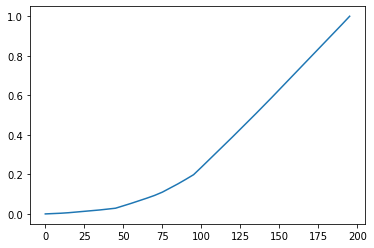

In [31]:
plt.plot(np.arange(0, 200, 5), np.cumsum(cumpdf/cumpdf.sum()))

In [31]:
v = np.arange(0, 2, 0.05)
nv = v / v.sum()

print("NV", nv)
print("NCUMPDF", cumpdf)

u = nv + cumpdf
u / u.max()

NV [0.         0.00128205 0.0025641  0.00384615 0.00512821 0.00641026
 0.00769231 0.00897436 0.01025641 0.01153846 0.01282051 0.01410256
 0.01538462 0.01666667 0.01794872 0.01923077 0.02051282 0.02179487
 0.02307692 0.02435897 0.02564103 0.02692308 0.02820513 0.02948718
 0.03076923 0.03205128 0.03333333 0.03461538 0.03589744 0.03717949
 0.03846154 0.03974359 0.04102564 0.04230769 0.04358974 0.04487179
 0.04615385 0.0474359  0.04871795 0.05      ]
NCUMPDF [0.         0.         0.00416667 0.00833333 0.00833333 0.0125
 0.0125     0.0125     0.01666667 0.01666667 0.05       0.05
 0.05833333 0.05833333 0.05833333 0.07916667 0.1        0.1
 0.11666667 0.125      0.17916667 0.17916667 0.17916667 0.17916667
 0.18333333 0.1875     0.1875     0.1875     0.1875     0.1875
 0.19583333 0.19583333 0.19583333 0.19583333 0.19583333 0.19583333
 0.19583333 0.19583333 0.19583333 0.2       ]


array([0.        , 0.00512821, 0.02692308, 0.04871795, 0.05384615,
       0.07564103, 0.08076923, 0.08589744, 0.10769231, 0.11282051,
       0.25128205, 0.25641026, 0.29487179, 0.3       , 0.30512821,
       0.39358974, 0.48205128, 0.48717949, 0.55897436, 0.5974359 ,
       0.81923077, 0.82435897, 0.82948718, 0.83461538, 0.85641026,
       0.87820513, 0.88333333, 0.88846154, 0.89358974, 0.89871795,
       0.93717949, 0.94230769, 0.9474359 , 0.9525641 , 0.95769231,
       0.96282051, 0.96794872, 0.97307692, 0.97820513, 1.        ])